# QUESTÃO 8

In [ ]:
!pip install hierarchicalforecast statsforecast datasetsforecast --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.8/275.8 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.4/548.4 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 8.2 MB/s eta 0:00:00


In [212]:
import pandas as pd
import numpy as np
from statsforecast.core import StatsForecast
from statsforecast.models import AutoARIMA, AutoETS, Naive, SeasonalNaive
from hierarchicalforecast.core import HierarchicalReconciliation
from hierarchicalforecast.methods import BottomUp
from datasetsforecast.hierarchical import HierarchicalData
from hierarchicalforecast.evaluation import HierarchicalEvaluation
from hierarchicalforecast.utils import aggregate

In [ ]:
Y_df = pd.read_csv('/content/agg__produto_loja.csv')

unique_combinations = Y_df.groupby(['STORE_NAME', 'PRODUCT_NAME']).size()
filtered_combinations = unique_combinations[unique_combinations > 8]
Y_df = Y_df[Y_df.set_index(['STORE_NAME', 'PRODUCT_NAME']).index.isin(filtered_combinations.index)]

Y_df = Y_df.rename({'QUANTITY_SOLD': 'y', 'ORDER_DATE': 'ds'}, axis=1)
Y_df['ds'] = pd.to_datetime(Y_df['ds'])
Y_df

,ds,PRODUCT_ID,PRODUCT_NAME,STORE_ID,STORE_NAME,REGION,y
383,2013-10-01,714,"Long-Sleeve Logo Jersey, M",828,Vigorous Exercise Company,Canada,7
385,2013-07-01,715,"Long-Sleeve Logo Jersey, L",828,Vigorous Exercise Company,Canada,12
386,2012-07-01,742,"HL Mountain Frame - Silver, 46",828,Vigorous Exercise Company,Canada,3
397,2011-10-01,748,"HL Mountain Frame - Silver, 38",828,Vigorous Exercise Company,Canada,3
400,2011-08-01,715,"Long-Sleeve Logo Jersey, L",828,Vigorous Exercise Company,Canada,4
...,...,...,...,...,...,...,...
60718,2012-12-01,743,"HL Mountain Frame - Black, 42",1970,Permanent Finish Products,Nevada,2
60725,2013-06-01,743,"HL Mountain Frame - Black, 42",1970,Permanent Finish Products,Nevada,3
60728,2012-12-01,747,"HL Mountain Frame - Black, 38",1970,Permanent Finish Products,Nevada,1
60738,2013-12-01,748,"HL Mountain Frame - Silver, 38",1970,Permanent Finish Products,Nevada,2


In [ ]:
#Definindo os níveis das hierarquias possíveis para a previsão
spec = [
    ['PRODUCT_NAME'],
    ['PRODUCT_NAME', 'STORE_NAME'],
]

# Criando novos dataframes S_df e tags que são especificações da hierarquia com a função aggregate
Y_df, S_df, tags = aggregate(Y_df, spec)
# Y_df = Y_df.reset_index()
Y_df

,unique_id,ds,y
0,AWC Logo Cap,2011-05-01,11
1,AWC Logo Cap,2011-07-01,24
2,AWC Logo Cap,2011-08-01,41
3,AWC Logo Cap,2011-10-01,56
4,AWC Logo Cap,2011-12-01,9
...,...,...,...
1611,"Sport-100 Helmet, Red/Vigorous Exercise Company",2013-04-01,4
1612,"Sport-100 Helmet, Red/Vigorous Exercise Company",2013-07-01,12
1613,"Sport-100 Helmet, Red/Vigorous Exercise Company",2013-10-01,9
1614,"Sport-100 Helmet, Red/Vigorous Exercise Company",2014-01-01,3


In [ ]:
from utilsforecast.preprocessing import fill_gaps

In [ ]:
##preenchendo as datas de combinações que não tem produtos vendidos com 0
print('Number of rows before filling gaps:', len(Y_df))
Y_df_complete = fill_gaps(Y_df, freq='MS')
print('Number of rows after filling gaps:', len(Y_df_complete))

Number of rows before filling gaps: 1616
Number of rows after filling gaps: 4467


In [ ]:
Y_df = Y_df_complete
Y_df['y'] = Y_df['y'].fillna(0)
Y_df

,unique_id,ds,y
0,AWC Logo Cap,2011-05-01,11.0
1,AWC Logo Cap,2011-06-01,0.0
2,AWC Logo Cap,2011-07-01,24.0
3,AWC Logo Cap,2011-08-01,41.0
4,AWC Logo Cap,2011-09-01,0.0
...,...,...,...
4462,"Sport-100 Helmet, Red/Vigorous Exercise Company",2014-01-01,3.0
4463,"Sport-100 Helmet, Red/Vigorous Exercise Company",2014-02-01,0.0
4464,"Sport-100 Helmet, Red/Vigorous Exercise Company",2014-03-01,0.0
4465,"Sport-100 Helmet, Red/Vigorous Exercise Company",2014-04-01,0.0


In [ ]:
# Utilizando os 3 últimos meses para teste
Y_test_df  = Y_df.groupby('unique_id').tail(3)
Y_train_df = Y_df.drop(Y_test_df.index)

In [ ]:
fcst = StatsForecast(
    models=[
        AutoETS(),
        AutoARIMA(),
        Naive(),
        SeasonalNaive(season_length=12)
      ],
    freq='MS',
    n_jobs=-1
)
Y_hat_df = fcst.forecast(df=Y_train_df, h=6, fitted=True)
Y_hat_df

,unique_id,ds,AutoETS,AutoARIMA,Naive,SeasonalNaive
0,AWC Logo Cap,2014-03-01,23.889544,23.852941,0.0,20.0
1,AWC Logo Cap,2014-04-01,23.889544,23.852941,0.0,34.0
2,AWC Logo Cap,2014-05-01,23.889544,23.852941,0.0,17.0
3,AWC Logo Cap,2014-06-01,23.889544,23.852941,0.0,45.0
4,AWC Logo Cap,2014-07-01,23.889544,23.852941,0.0,47.0
...,...,...,...,...,...,...
763,"Sport-100 Helmet, Red/Vigorous Exercise Company",2014-04-01,2.072515,2.072442,0.0,4.0
764,"Sport-100 Helmet, Red/Vigorous Exercise Company",2014-05-01,2.072515,2.072442,0.0,0.0
765,"Sport-100 Helmet, Red/Vigorous Exercise Company",2014-06-01,2.072515,2.072442,0.0,0.0
766,"Sport-100 Helmet, Red/Vigorous Exercise Company",2014-07-01,2.072515,2.072442,0.0,12.0


In [ ]:
## Aqui consigo ver os 3 ultimos meses que tinha no df e foram usado para teste
Y_test_df.head(20)

,unique_id,ds,y
34,AWC Logo Cap,2014-03-01,55.0
35,AWC Logo Cap,2014-04-01,0.0
36,AWC Logo Cap,2014-05-01,33.0
68,AWC Logo Cap/Advanced Bike Components,2014-03-01,0.0
69,AWC Logo Cap/Advanced Bike Components,2014-04-01,0.0
70,AWC Logo Cap/Advanced Bike Components,2014-05-01,12.0
105,AWC Logo Cap/Better Bike Shop,2014-03-01,3.0
106,AWC Logo Cap/Better Bike Shop,2014-04-01,0.0
107,AWC Logo Cap/Better Bike Shop,2014-05-01,0.0
142,AWC Logo Cap/Bike Dealers Association,2014-03-01,12.0


In [ ]:
## Aqui consigo ver os 3 meses + teste e os 3 mês futuros previstos
Y_hat_df.head(20)

,unique_id,ds,AutoETS,AutoARIMA,Naive,SeasonalNaive
0,AWC Logo Cap,2014-03-01,23.889544,23.852941,0.0,20.0
1,AWC Logo Cap,2014-04-01,23.889544,23.852941,0.0,34.0
2,AWC Logo Cap,2014-05-01,23.889544,23.852941,0.0,17.0
3,AWC Logo Cap,2014-06-01,23.889544,23.852941,0.0,45.0
4,AWC Logo Cap,2014-07-01,23.889544,23.852941,0.0,47.0
5,AWC Logo Cap,2014-08-01,23.889544,23.852941,0.0,30.0
6,AWC Logo Cap/Advanced Bike Components,2014-03-01,2.384286,3.923651,0.0,0.0
7,AWC Logo Cap/Advanced Bike Components,2014-04-01,2.384286,2.430195,0.0,2.0
8,AWC Logo Cap/Advanced Bike Components,2014-05-01,2.384286,2.430195,0.0,0.0
9,AWC Logo Cap/Advanced Bike Components,2014-06-01,2.384286,2.430195,0.0,0.0


In [ ]:
## comparando o que previu com o que tinhamos em teste
result = pd.merge(Y_hat_df,Y_test_df, on=['ds', 'unique_id'], how='inner')
result.head(20)

,unique_id,ds,AutoETS,AutoARIMA,Naive,SeasonalNaive,y
0,AWC Logo Cap,2014-03-01,23.889544,23.852941,0.0,20.0,55.0
1,AWC Logo Cap,2014-04-01,23.889544,23.852941,0.0,34.0,0.0
2,AWC Logo Cap,2014-05-01,23.889544,23.852941,0.0,17.0,33.0
3,AWC Logo Cap/Advanced Bike Components,2014-03-01,2.384286,3.923651,0.0,0.0,0.0
4,AWC Logo Cap/Advanced Bike Components,2014-04-01,2.384286,2.430195,0.0,2.0,0.0
5,AWC Logo Cap/Advanced Bike Components,2014-05-01,2.384286,2.430195,0.0,0.0,12.0
6,AWC Logo Cap/Better Bike Shop,2014-03-01,1.290202,2.132290,0.0,0.0,3.0
7,AWC Logo Cap/Better Bike Shop,2014-04-01,1.290202,1.318080,0.0,0.0,0.0
8,AWC Logo Cap/Better Bike Shop,2014-05-01,1.290202,1.318080,0.0,5.0,0.0
9,AWC Logo Cap/Bike Dealers Association,2014-03-01,2.492035,3.758157,0.0,0.0,12.0


In [ ]:
# Métodos de reconciliação
reconcilers = [
    BottomUp(),
]
hrec = HierarchicalReconciliation(reconcilers=reconcilers)
Y_rec_df = hrec.reconcile(Y_hat_df=Y_hat_df, Y_df=Y_train_df, S=S_df, tags=tags)

In [ ]:
from hierarchicalforecast.evaluation import evaluate
from utilsforecast.losses import mse

In [ ]:
## calculando os erros

df = Y_rec_df.merge(Y_test_df, on=['unique_id', 'ds'], how='left')

evaluate(df=df, metrics=[mse], tags=tags)


,level,metric,AutoETS,AutoARIMA,Naive,SeasonalNaive,AutoETS/BottomUp,AutoARIMA/BottomUp,Naive/BottomUp,SeasonalNaive/BottomUp
0,PRODUCT_NAME,mse,147.611204,145.787628,364.955556,190.888889,142.991307,112.540404,364.955556,190.888889
1,PRODUCT_NAME/STORE_NAME,mse,9.018942,8.339494,11.991150,19.097345,9.018942,8.339494,11.991150,19.097345
2,Overall,mse,25.260223,24.446697,53.354167,39.229167,24.718829,20.550538,53.354167,39.229167


O modelo AutoARIMA apresentou um erro menor sem métodos de reconciliação e também com método de reconciliação BottomUp, quando comparado aos outros modelos

### Sazonalidade do AWC Logo Cap

A partir do datset original, foram selecionados apenas os produtos com nome de luva, e agrupados por data, conforme a consulta sql a seguir, para gerar o dataset dessa questão:


```
with
  awc_logo_cap as (
      select * from agg__produto_loja
      where product_name = 'AWC Logo Cap'
      order by order_date
  )
select
  order_date
  , sum(quantity_sold)
from awc_logo_cap
group by order_date
order by order_date
```



In [ ]:
P_df = pd.read_csv('/content/awc_logo_cap.csv')
P_df = P_df.rename({'SUM(QUANTITY_SOLD)': 'y', 'ORDER_DATE': 'ds'}, axis=1)
P_df['ds'] = pd.to_datetime(P_df['ds'])
P_df["unique_id"] = "unico"
P_df

,ds,y,unique_id
0,2011-05-01,40,unico
1,2011-07-01,103,unico
2,2011-08-01,137,unico
3,2011-10-01,240,unico
4,2011-12-01,25,unico
5,2012-01-01,153,unico
6,2012-02-01,48,unico
7,2012-03-01,125,unico
8,2012-04-01,114,unico
9,2012-05-01,215,unico


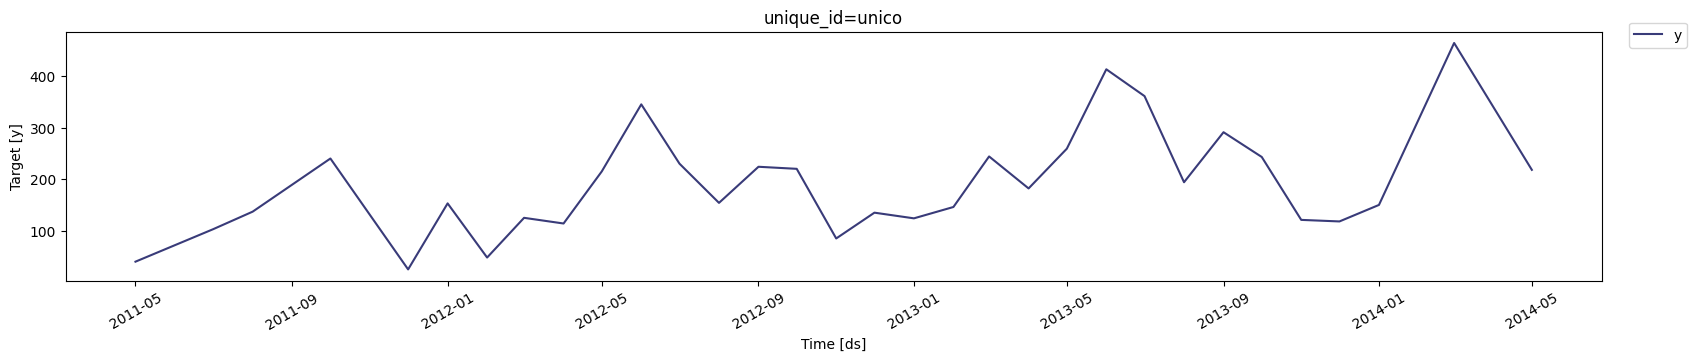

In [ ]:
from statsforecast import StatsForecast

StatsForecast.plot(P_df)

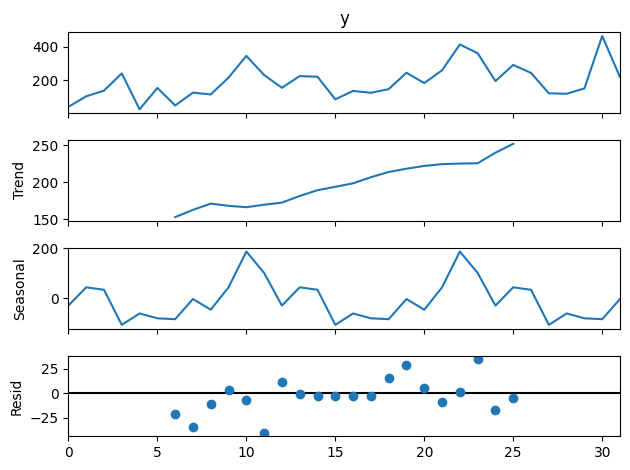

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
a = seasonal_decompose(P_df["y"], model = "add", period=12)
a.plot();

# Questão 9

In [ ]:
!pip install mlforecast --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.3 MB/s eta 0:00:00


In [ ]:
P_df = pd.read_csv('/content/agg__produto_loja.csv')

unique_combinations = P_df.groupby(['STORE_NAME', 'PRODUCT_NAME']).size()
filtered_combinations = unique_combinations[unique_combinations > 8]
P_df = P_df[P_df.set_index(['STORE_NAME', 'PRODUCT_NAME']).index.isin(filtered_combinations.index)]

P_df = P_df.rename({'QUANTITY_SOLD': 'y', 'ORDER_DATE': 'ds'}, axis=1)
P_df['ds'] = pd.to_datetime(P_df['ds'])
P_df

,ds,PRODUCT_ID,PRODUCT_NAME,STORE_ID,STORE_NAME,REGION,y
383,2013-10-01,714,"Long-Sleeve Logo Jersey, M",828,Vigorous Exercise Company,Canada,7
385,2013-07-01,715,"Long-Sleeve Logo Jersey, L",828,Vigorous Exercise Company,Canada,12
386,2012-07-01,742,"HL Mountain Frame - Silver, 46",828,Vigorous Exercise Company,Canada,3
397,2011-10-01,748,"HL Mountain Frame - Silver, 38",828,Vigorous Exercise Company,Canada,3
400,2011-08-01,715,"Long-Sleeve Logo Jersey, L",828,Vigorous Exercise Company,Canada,4
...,...,...,...,...,...,...,...
60718,2012-12-01,743,"HL Mountain Frame - Black, 42",1970,Permanent Finish Products,Nevada,2
60725,2013-06-01,743,"HL Mountain Frame - Black, 42",1970,Permanent Finish Products,Nevada,3
60728,2012-12-01,747,"HL Mountain Frame - Black, 38",1970,Permanent Finish Products,Nevada,1
60738,2013-12-01,748,"HL Mountain Frame - Silver, 38",1970,Permanent Finish Products,Nevada,2


In [ ]:
spec = [
    ['PRODUCT_NAME'],
    ['PRODUCT_NAME', 'STORE_NAME'],
]

# Criando novos dataframes S_df e tags que são especificações da hierarquia com a função aggregate
P_df, S_df, tags = aggregate(P_df, spec)
P_df

,unique_id,ds,y
0,AWC Logo Cap,2011-05-01,11
1,AWC Logo Cap,2011-07-01,24
2,AWC Logo Cap,2011-08-01,41
3,AWC Logo Cap,2011-10-01,56
4,AWC Logo Cap,2011-12-01,9
...,...,...,...
1611,"Sport-100 Helmet, Red/Vigorous Exercise Company",2013-04-01,4
1612,"Sport-100 Helmet, Red/Vigorous Exercise Company",2013-07-01,12
1613,"Sport-100 Helmet, Red/Vigorous Exercise Company",2013-10-01,9
1614,"Sport-100 Helmet, Red/Vigorous Exercise Company",2014-01-01,3


In [ ]:
##preenchendo as datas de combinações que não tem produtos vendidos com 0
print('Number of rows before filling gaps:', len(P_df))
P_df_complete = fill_gaps(P_df, freq='MS')
print('Number of rows after filling gaps:', len(P_df_complete))

Number of rows before filling gaps: 1616
Number of rows after filling gaps: 4467


In [ ]:
P_df = P_df_complete
P_df['y'] = P_df['y'].fillna(0)

In [ ]:
# Utilizando os 3 últimos meses para teste
P_test_df  = P_df.groupby('unique_id').tail(3)
P_train_df = P_df.drop(P_test_df.index)

In [ ]:
from sklearn.linear_model import LinearRegression
from mlforecast import MLForecast
from mlforecast.utils import PredictionIntervals
import xgboost as xgb

In [ ]:
mf = MLForecast(models=[xgb.XGBRegressor()],
                freq='MS',
                lags=[1,2,12],
                date_features=['month'],
                )
mf.fit(P_train_df, fitted=True, prediction_intervals=PredictionIntervals(n_windows=4, h=3))
P_hat_mf = mf.predict(3, level=np.arange(0, 100, 2))
insample_mf = mf.forecast_fitted_values()

/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:130: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[names] = values
/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:130: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[names] = values
/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:130: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once u

In [ ]:
## Aqui consigo ver os 3 ultimos meses que tinha no df e foram usado para teste
Y_test_df.head(20)

,unique_id,ds,y
34,AWC Logo Cap,2014-03-01,55.0
35,AWC Logo Cap,2014-04-01,0.0
36,AWC Logo Cap,2014-05-01,33.0
68,AWC Logo Cap/Advanced Bike Components,2014-03-01,0.0
69,AWC Logo Cap/Advanced Bike Components,2014-04-01,0.0
70,AWC Logo Cap/Advanced Bike Components,2014-05-01,12.0
105,AWC Logo Cap/Better Bike Shop,2014-03-01,3.0
106,AWC Logo Cap/Better Bike Shop,2014-04-01,0.0
107,AWC Logo Cap/Better Bike Shop,2014-05-01,0.0
142,AWC Logo Cap/Bike Dealers Association,2014-03-01,12.0


In [ ]:
## Aqui consigo ver os 3 meses + teste e os 3 mês futuros previstos
Y_hat_df.head(20)

,unique_id,ds,AutoETS,AutoARIMA,Naive,SeasonalNaive
0,AWC Logo Cap,2014-03-01,23.889544,23.852941,0.0,20.0
1,AWC Logo Cap,2014-04-01,23.889544,23.852941,0.0,34.0
2,AWC Logo Cap,2014-05-01,23.889544,23.852941,0.0,17.0
3,AWC Logo Cap,2014-06-01,23.889544,23.852941,0.0,45.0
4,AWC Logo Cap,2014-07-01,23.889544,23.852941,0.0,47.0
5,AWC Logo Cap,2014-08-01,23.889544,23.852941,0.0,30.0
6,AWC Logo Cap/Advanced Bike Components,2014-03-01,2.384286,3.923651,0.0,0.0
7,AWC Logo Cap/Advanced Bike Components,2014-04-01,2.384286,2.430195,0.0,2.0
8,AWC Logo Cap/Advanced Bike Components,2014-05-01,2.384286,2.430195,0.0,0.0
9,AWC Logo Cap/Advanced Bike Components,2014-06-01,2.384286,2.430195,0.0,0.0


In [ ]:
## comparando o que previu com o que tinhamos em teste
result2 = pd.merge(P_hat_mf,P_test_df, on=['ds', 'unique_id'], how='inner')
result2.head(10)

,unique_id,ds,XGBRegressor,XGBRegressor-lo-98,XGBRegressor-lo-96,XGBRegressor-lo-94,XGBRegressor-lo-92,XGBRegressor-lo-90,XGBRegressor-lo-88,XGBRegressor-lo-86,...,XGBRegressor-hi-82,XGBRegressor-hi-84,XGBRegressor-hi-86,XGBRegressor-hi-88,XGBRegressor-hi-90,XGBRegressor-hi-92,XGBRegressor-hi-94,XGBRegressor-hi-96,XGBRegressor-hi-98,y
0,AWC Logo Cap,2014-03-01,9.385703,-9.279820,-8.851846,-8.423871,-7.995896,-7.567921,-7.139946,-6.711971,...,24.627428,25.055403,25.483378,25.911352,26.339327,26.767302,27.195277,27.623252,28.051227,55.0
1,AWC Logo Cap,2014-04-01,22.321592,2.261282,2.468766,2.676251,2.883736,3.091221,3.298706,3.506191,...,40.722024,40.929509,41.136994,41.344479,41.551964,41.759448,41.966933,42.174418,42.381903,0.0
2,AWC Logo Cap,2014-05-01,16.824413,-1.050272,-0.579291,-0.108310,0.362670,0.833651,1.304632,1.775613,...,30.931253,31.402233,31.873214,32.344195,32.815176,33.286156,33.757137,34.228118,34.699098,33.0
3,AWC Logo Cap/Advanced Bike Components,2014-03-01,-0.036093,-1.253762,-1.163752,-1.073742,-0.983732,-0.893722,-0.803712,-0.713702,...,0.461497,0.551507,0.641517,0.731527,0.821537,0.911547,1.001557,1.091567,1.181577,0.0
4,AWC Logo Cap/Advanced Bike Components,2014-04-01,3.559895,-14.175434,-13.797726,-13.420019,-13.042311,-12.664603,-12.286896,-11.909188,...,18.273562,18.651270,19.028977,19.406685,19.784393,20.162100,20.539808,20.917516,21.295223,0.0
5,AWC Logo Cap/Advanced Bike Components,2014-05-01,-0.042254,-1.100888,-1.029953,-0.959018,-0.888082,-0.817147,-0.746212,-0.675276,...,0.448898,0.519833,0.590769,0.661704,0.732639,0.803574,0.874510,0.945445,1.016380,12.0
6,AWC Logo Cap/Better Bike Shop,2014-03-01,0.626316,0.474563,0.484602,0.494641,0.504679,0.514718,0.524757,0.534796,...,0.697759,0.707798,0.717837,0.727875,0.737914,0.747953,0.757992,0.768031,0.778070,3.0
7,AWC Logo Cap/Better Bike Shop,2014-04-01,1.012979,0.987651,0.988445,0.989240,0.990034,0.990829,0.991623,0.992418,...,1.031952,1.032746,1.033541,1.034335,1.035130,1.035924,1.036719,1.037513,1.038307,0.0
8,AWC Logo Cap/Better Bike Shop,2014-05-01,0.671796,-5.751644,-5.569316,-5.386988,-5.204660,-5.022332,-4.840005,-4.657677,...,5.636613,5.818940,6.001268,6.183596,6.365924,6.548252,6.730580,6.912908,7.095235,0.0
9,AWC Logo Cap/Bike Dealers Association,2014-03-01,0.626316,0.333475,0.346426,0.359377,0.372328,0.385279,0.398230,0.411181,...,0.815550,0.828501,0.841452,0.854403,0.867354,0.880305,0.893255,0.906206,0.919157,12.0


In [ ]:
## Calculando o erro
df = P_hat_mf.merge(P_test_df, on=['unique_id', 'ds'], how='left')

evaluate(df=df, metrics=[mse], tags=tags)

,level,metric,XGBRegressor
0,PRODUCT_NAME,mse,157.031260
1,PRODUCT_NAME/STORE_NAME,mse,15.199811
2,Overall,mse,31.820684


O modelo regressão linear apresenta erros mais altos do que os apresentados anteriormente pelo modelo AutoARIMA, indicando que poderiamos resolver o problema utilizando esse método porém ele apresentaria erros maiores.


# QUESTÃO 10

Grupo Outros Países

In [ ]:
Y_df = pd.read_csv('/content/agg__produto_loja.csv')
Y_df = Y_df.rename({'QUANTITY_SOLD': 'y', 'ORDER_DATE': 'ds'}, axis=1)
Y_df['ds'] = pd.to_datetime(Y_df['ds'])
Y_df = Y_df[Y_df['REGION'].isin(['Canada', 'France', 'Germany', 'Australia', 'United Kingdom'])]
Y_df = Y_df.groupby("ds")[["y"]].sum()
Y_df = Y_df.reset_index()
Y_df

,ds,y
0,2011-05-01,226
1,2011-07-01,487
2,2011-08-01,643
3,2011-10-01,1048
4,2011-12-01,239
5,2012-01-01,776
6,2012-02-01,374
7,2012-03-01,618
8,2012-04-01,420
9,2012-05-01,2578


In [ ]:
Y_df["unique_id"] = "unico"
Y_df.head()

,ds,y,unique_id
0,2011-05-01,226,unico
1,2011-07-01,487,unico
2,2011-08-01,643,unico
3,2011-10-01,1048,unico
4,2011-12-01,239,unico


In [ ]:
from utilsforecast.preprocessing import fill_gaps

##preenchendo as datas de combinações que não tem produtos vendidos com 0
print('Number of rows before filling gaps:', len(Y_df))
Y_df_complete = fill_gaps(Y_df, freq='MS')
print('Number of rows after filling gaps:', len(Y_df_complete))

Y_df = Y_df_complete
Y_df['y'] = Y_df['y'].fillna(0)
Y_df

Number of rows before filling gaps: 34
Number of rows after filling gaps: 37


,unique_id,ds,y
0,unico,2011-05-01,226.0
1,unico,2011-06-01,0.0
2,unico,2011-07-01,487.0
3,unico,2011-08-01,643.0
4,unico,2011-09-01,0.0
5,unico,2011-10-01,1048.0
6,unico,2011-11-01,0.0
7,unico,2011-12-01,239.0
8,unico,2012-01-01,776.0
9,unico,2012-02-01,374.0


In [ ]:
# Utilizando os 6 últimos meses para teste
Y_test_df  = Y_df.tail(6)
Y_train_df = Y_df.drop(Y_test_df.index)

fcst = StatsForecast(
    models=[
        AutoARIMA(season_length=12),
      ],
    freq='MS',
    n_jobs=-1
)
Y_hat_df = fcst.forecast(df=Y_train_df, h=9)
Y_hat_df

,unique_id,ds,AutoARIMA
0,unico,2013-12-01,3276.887545
1,unico,2014-01-01,2848.887545
2,unico,2014-02-01,3443.887545
3,unico,2014-03-01,4229.887545
4,unico,2014-04-01,3606.887545
5,unico,2014-05-01,5535.887545
6,unico,2014-06-01,8946.887545
7,unico,2014-07-01,8740.887545
8,unico,2014-08-01,4602.887545


In [ ]:
## Datas de teste
Y_test_df

,unique_id,ds,y
31,unico,2013-12-01,2924.0
32,unico,2014-01-01,3117.0
33,unico,2014-02-01,14.0
34,unico,2014-03-01,7589.0
35,unico,2014-04-01,18.0
36,unico,2014-05-01,4955.0


In [ ]:
## Previsão das datas de treino + 3 meses futuros
Y_hat_df

,unique_id,ds,AutoARIMA
0,unico,2013-12-01,3276.887545
1,unico,2014-01-01,2848.887545
2,unico,2014-02-01,3443.887545
3,unico,2014-03-01,4229.887545
4,unico,2014-04-01,3606.887545
5,unico,2014-05-01,5535.887545
6,unico,2014-06-01,8946.887545
7,unico,2014-07-01,8740.887545
8,unico,2014-08-01,4602.887545


Grupo Estados Unidos

In [ ]:
Y_df = pd.read_csv('/content/agg__produto_loja.csv')
Y_df = Y_df.rename({'QUANTITY_SOLD': 'y', 'ORDER_DATE': 'ds'}, axis=1)
Y_df['ds'] = pd.to_datetime(Y_df['ds'])
Y_df = Y_df[~Y_df['REGION'].isin(['Canada', 'France', 'Germany', 'Australia', 'United Kingdom'])]
Y_df = Y_df.groupby("ds")[["y"]].sum()
Y_df = Y_df.reset_index()
Y_df

,ds,y
0,2011-05-01,594
1,2011-07-01,1566
2,2011-08-01,2111
3,2011-10-01,4160
4,2011-12-01,613
5,2012-01-01,2998
6,2012-02-01,886
7,2012-03-01,2347
8,2012-04-01,1784
9,2012-05-01,4924


In [ ]:
Y_df["unique_id"] = "unico"
Y_df.head()

##preenchendo as datas de combinações que não tem produtos vendidos com 0
print('Number of rows before filling gaps:', len(Y_df))
Y_df_complete = fill_gaps(Y_df, freq='MS')
print('Number of rows after filling gaps:', len(Y_df_complete))

Y_df = Y_df_complete
Y_df['y'] = Y_df['y'].fillna(0)
Y_df.head

Number of rows before filling gaps: 32
Number of rows after filling gaps: 37


,unique_id,ds,y
0,unico,2011-05-01,594.0
1,unico,2011-06-01,0.0
2,unico,2011-07-01,1566.0
3,unico,2011-08-01,2111.0
4,unico,2011-09-01,0.0
5,unico,2011-10-01,4160.0
6,unico,2011-11-01,0.0
7,unico,2011-12-01,613.0
8,unico,2012-01-01,2998.0
9,unico,2012-02-01,886.0


In [ ]:
# Utilizando os 6 últimos meses para teste
Y_test_df  = Y_df.tail(6)
Y_train_df = Y_df.drop(Y_test_df.index)

fcst = StatsForecast(
    models=[
        AutoARIMA(season_length=12),
      ],
    freq='MS',
    n_jobs=-1
)
Y_hat_df = fcst.forecast(df=Y_train_df, h=9)
Y_hat_df

,unique_id,ds,AutoARIMA
0,unico,2013-12-01,4540.942125
1,unico,2014-01-01,3669.942125
2,unico,2014-02-01,4614.942125
3,unico,2014-03-01,6371.942125
4,unico,2014-04-01,5174.942125
5,unico,2014-05-01,6999.942125
6,unico,2014-06-01,8878.942125
7,unico,2014-07-01,8713.942125
8,unico,2014-08-01,5516.942125


In [ ]:
## Datas de teste
Y_test_df

,unique_id,ds,y
31,unico,2013-12-01,3454.0
32,unico,2014-01-01,3481.0
33,unico,2014-02-01,0.0
34,unico,2014-03-01,9685.0
35,unico,2014-04-01,0.0
36,unico,2014-05-01,5305.0


In [ ]:
## Previsão das datas de treino + 3 meses futuros
Y_hat_df

,unique_id,ds,AutoARIMA
0,unico,2013-12-01,4540.942125
1,unico,2014-01-01,3669.942125
2,unico,2014-02-01,4614.942125
3,unico,2014-03-01,6371.942125
4,unico,2014-04-01,5174.942125
5,unico,2014-05-01,6999.942125
6,unico,2014-06-01,8878.942125
7,unico,2014-07-01,8713.942125
8,unico,2014-08-01,5516.942125


A previsão de demanda para os Estados Unidos nos próximos 3 meses foi de:

*   2014-06-01: 8878
*   2014-07-01: 8713
*   2014-08-01: 5516

Enquanto para os outros países, a previsão de demanda foi de:

*   2014-06-01: 8946
*   2014-07-01: 8740
*   2014-08-01: 4602

Sendo assim, a demanda total é maior para os Estados Unidos, com um total de 23109, em comparação com os outros países, que somam 22290

A demanda para os Estados Unidos é maior nos próximos 3 meses

# QUESTÃO 11

A partir do datset original, foram selecionados apenas os produtos com nome de luva, e agrupados por data, conforme a consulta sql a seguir, para gerar o dataset dessa questão:

```
with
  luvas as (
      select * from agg__produto_loja
      where product_name ilike '%gloves%'
      order by order_date
  )
select
  order_date
  , sum(quantity_sold)
from luvas
group by order_date
order by order_date
```



In [ ]:
L_df = pd.read_csv('/content/luvas.csv')
L_df = L_df.rename({'SUM(QUANTITY_SOLD)': 'y', 'ORDER_DATE': 'ds'}, axis=1)
L_df['ds'] = pd.to_datetime(L_df['ds'])
L_df

,ds,y
0,2012-05-01,773
1,2012-06-01,998
2,2012-07-01,887
3,2012-08-01,522
4,2012-09-01,728
5,2012-10-01,644
6,2012-11-01,339
7,2012-12-01,551
8,2013-01-01,353
9,2013-02-01,579


In [ ]:
L_df["unique_id"] = "unico"
L_df.head()

,ds,y,unique_id
0,2012-05-01,773,unico
1,2012-06-01,998,unico
2,2012-07-01,887,unico
3,2012-08-01,522,unico
4,2012-09-01,728,unico


In [ ]:
from utilsforecast.preprocessing import fill_gaps

##preenchendo as datas de combinações que não tem produtos vendidos com 0
print('Number of rows before filling gaps:', len(L_df))
L_df_complete = fill_gaps(L_df, freq='MS')
print('Number of rows after filling gaps:', len(L_df_complete))

L_df = L_df_complete
L_df['y'] = L_df['y'].fillna(0)
L_df

Number of rows before filling gaps: 24
Number of rows after filling gaps: 25


,unique_id,ds,y
0,unico,2012-05-01,773.0
1,unico,2012-06-01,998.0
2,unico,2012-07-01,887.0
3,unico,2012-08-01,522.0
4,unico,2012-09-01,728.0
5,unico,2012-10-01,644.0
6,unico,2012-11-01,339.0
7,unico,2012-12-01,551.0
8,unico,2013-01-01,353.0
9,unico,2013-02-01,579.0


In [ ]:
# Utilizando os 6 últimos meses para teste
L_test_df  = L_df.tail(6)
L_train_df = L_df.drop(L_test_df.index)

fcst = StatsForecast(
    models=[
        AutoARIMA(),
      ],
    freq='MS',
    n_jobs=-1
)
L_hat_df = fcst.forecast(df=L_train_df, h=8)
L_hat_df

,unique_id,ds,AutoARIMA
0,unico,2013-12-01,143.0
1,unico,2014-01-01,143.0
2,unico,2014-02-01,143.0
3,unico,2014-03-01,143.0
4,unico,2014-04-01,143.0
5,unico,2014-05-01,143.0
6,unico,2014-06-01,143.0
7,unico,2014-07-01,143.0


In [ ]:
## Datas de treino
L_test_df.head()

,unique_id,ds,y
19,unico,2013-12-01,129.0
20,unico,2014-01-01,115.0
21,unico,2014-02-01,0.0
22,unico,2014-03-01,505.0
23,unico,2014-04-01,8.0


In [ ]:
## Previsão das datas de treino + 3 meses futuros
L_hat_df

,unique_id,ds,AutoARIMA
0,unico,2013-12-01,143.0
1,unico,2014-01-01,143.0
2,unico,2014-02-01,143.0
3,unico,2014-03-01,143.0
4,unico,2014-04-01,143.0
5,unico,2014-05-01,143.0
6,unico,2014-06-01,143.0
7,unico,2014-07-01,143.0


**Para os próximos 3 mêses precisa de 143 luvas cada mês, sendo assim, 429 luvas no total, 858 zíperes.**

In [ ]:
##comparando os meses de teste com os previstos
(L_hat_df := L_hat_df.merge(L_test_df, on="ds"))

,unique_id_x,ds,AutoARIMA,unique_id_y,y
0,unico,2013-12-01,143.0,unico,129.0
1,unico,2014-01-01,143.0,unico,115.0
2,unico,2014-02-01,143.0,unico,0.0
3,unico,2014-03-01,143.0,unico,505.0
4,unico,2014-04-01,143.0,unico,8.0
5,unico,2014-05-01,143.0,unico,261.0


In [ ]:
#Calculando o erro
L_hat_df["abs_pct_error"] = abs(L_hat_df["AutoARIMA"]-L_hat_df["y"])/L_hat_df["y"]
L_hat_df

,unique_id_x,ds,AutoARIMA,unique_id_y,y,abs_pct_error
0,unico,2013-12-01,143.0,unico,129.0,0.108527
1,unico,2014-01-01,143.0,unico,115.0,0.243478
2,unico,2014-02-01,143.0,unico,0.0,inf
3,unico,2014-03-01,143.0,unico,505.0,0.716832
4,unico,2014-04-01,143.0,unico,8.0,16.875000
5,unico,2014-05-01,143.0,unico,261.0,0.452107
